# **Income Prediction Model**

## **Introduction**

Income inequality, where income is distributed unevenly among a population, is a growing problem in developing nations across the world. With the rapid rise of artificial intelligence (AI) and worker automation, this problem could continue to grow if steps are not taken to address the issue.

The objective of this project is to create a machine learning model to predict whether an individual earns above or below a certain amount. This solution can potentially reduce costs and improve the accuracy of monitoring key population indicators such as income levels in between census years.

Accurate income predictions can provide valuable insights that help policymakers better manage and avoid income inequality globally. By leveraging machine learning techniques, we aim to provide a robust tool for analyzing income distribution, which is crucial for developing effective socioeconomic policies and interventions.

The project follows the CRISP-DM methodology as follows:
- Business Understanding 
- Data Understanding
- Data Preparation
- Modelling
- Evaluation
- Deployment

## **Business Understanding**

#### **Business Objective**
To address income inequality by providing accurate and timely predictions of individual income levels, aiding policymakers in their efforts to manage and reduce income disparity effectively.

**Business Needs:** A model to accurately predict if an individual earns above 50,000 USD.

#### **Project Goals**
- To create a machine learning model to predict if an individual earns above 50,000 USD.
- To create an API for user interaction

#### **Hypotheses**
1. 
Null Hypothesis (H0): There is no significant relationship between wages per hour and income level above 50,000 USD.

Alternative Hypothesis (H1): There is a significant relationship between wages per hour and income level above 50,000 USD.

2. 
Null Hypothesis (H0): There is no significant relationship between age and income level above 50,000 USD.

Alternative Hypothesis (H1): There is a significant relationship between age and income level above 50,000 USD.

3. 
Null Hypothesis (H0): There is no significant relationship between industry type and income level above 50,000 USD.

Alternative Hypothesis (H1): There is a significant relationship between industry type and income level above 50,000 USD.

#### **Analytical Questions**
1. What are the key factors influencing whether an individual earns above 50,000 USD?
2. How does the number of hours worked per week impact income level predictions?
3. What role do education level and occupation play in determining income above the specified threshold?
4. Are there any significant regional differences in income levels above 50,000 USD?
5. How does industry type impact income level?

#### **Timeline** **Week One:**
- Data Collection & Cleaning
- Exploratory Data Analysis
- Feature Engineering
- Model Building & Evaluation

**Week Two:**
- Model Tuning & Optimization
- Final Model Evaluation
- App Deployment
- Documentation & Reporting

## **Data Understanding**

#### Load Necessary Packages

In [2]:
# Data handling packages 
import pandas as pd
import numpy as np 

# Visualization packages
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Feature Processing packages
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, mutual_info_classif as Mutual_Info_Classif
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.metrics import confusion_matrix

# Machine Learning packages
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Hyperparameters Fine-tuning packages
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold

import joblib


#### Load Data

In [3]:
# Load all datasets
# Load training data
train_data = pd.read_csv('../Data/train_data.csv')

train_data.head()

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,...,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit


In [4]:
# Load testing data
test_data = pd.read_csv('../Data/test_data.csv')
test_data.head()

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record
0,ID_TZ209499,54,Male,High school graduate,Private,NaN,Married-civilian spouse present,White,All other,Children or Armed Forces,...,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,3388.96
1,ID_TZ209500,53,Male,5th or 6th grade,Private,NaN,Married-civilian spouse present,White,Central or South American,Full-time schedules,...,El-Salvador,El-Salvador,?,?,?,?,NaN,NaN,NaN,1177.55
2,ID_TZ209501,42,Male,Bachelors degree(BA AB BS),Private,NaN,Married-civilian spouse present,White,All other,Full-time schedules,...,US,US,?,?,?,?,NaN,NaN,NaN,4898.55
3,ID_TZ209502,16,Female,9th grade,NaN,High school,Never married,White,All other,Children or Armed Forces,...,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1391.44
4,ID_TZ209503,16,Male,9th grade,NaN,High school,Never married,White,All other,Not in labor force,...,US,US,?,?,?,?,NaN,NaN,NaN,1933.18


### **Exploratory Data Analysis**

#### Train Data

In [5]:
# Check columns
train_data.columns

Index(['ID', 'age', 'gender', 'education', 'class', 'education_institute',
       'marital_status', 'race', 'is_hispanic', 'employment_commitment',
       'unemployment_reason', 'employment_stat', 'wage_per_hour',
       'is_labor_union', 'working_week_per_year', 'industry_code',
       'industry_code_main', 'occupation_code', 'occupation_code_main',
       'total_employed', 'household_stat', 'household_summary',
       'under_18_family', 'veterans_admin_questionnaire', 'vet_benefit',
       'tax_status', 'gains', 'losses', 'stocks_status', 'citizenship',
       'mig_year', 'country_of_birth_own', 'country_of_birth_father',
       'country_of_birth_mother', 'migration_code_change_in_msa',
       'migration_prev_sunbelt', 'migration_code_move_within_reg',
       'migration_code_change_in_reg', 'residence_1_year_ago',
       'old_residence_reg', 'old_residence_state', 'importance_of_record',
       'income_above_limit'],
      dtype='object')

In [7]:
# Check general information
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   class                           104254 non-null  object 
 5   education_institute             13302 non-null   object 
 6   marital_status                  209499 non-null  object 
 7   race                            209499 non-null  object 
 8   is_hispanic                     209499 non-null  object 
 9   employment_commitment           209499 non-null  object 
 10  unemployment_reason             6520 non-null    object 
 11  employment_stat                 209499 non-null  int64  
 12  wage_per_hour   

In [8]:
# Check statistical description of numerical columns
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,209499.0,34.518728,22.306738,0.00,15.00,33.00,50.00,90.0
employment_stat,209499.0,0.176760,0.555562,0.00,0.00,0.00,0.00,2.0
wage_per_hour,209499.0,55.433487,276.757327,0.00,0.00,0.00,0.00,9999.0
working_week_per_year,209499.0,23.158850,24.397963,0.00,0.00,8.00,52.00,52.0
industry_code,209499.0,15.332398,18.049655,0.00,0.00,0.00,33.00,51.0
occupation_code,209499.0,11.321734,14.460839,0.00,0.00,0.00,26.00,46.0
total_employed,209499.0,1.956067,2.365154,0.00,0.00,1.00,4.00,6.0
vet_benefit,209499.0,1.515854,0.850853,0.00,2.00,2.00,2.00,2.0
gains,209499.0,435.926887,4696.359500,0.00,0.00,0.00,0.00,99999.0
losses,209499.0,36.881737,270.383302,0.00,0.00,0.00,0.00,4608.0


In [9]:
# Check for Duplicates
train_data.duplicated().sum()

np.int64(0)

In [10]:
# Check for null values
train_data.isna().sum()

ID                                     0
age                                    0
gender                                 0
education                              0
class                             105245
education_institute               196197
marital_status                         0
race                                   0
is_hispanic                            0
employment_commitment                  0
unemployment_reason               202979
employment_stat                        0
wage_per_hour                          0
is_labor_union                    189420
working_week_per_year                  0
industry_code                          0
industry_code_main                     0
occupation_code                        0
occupation_code_main              105694
total_employed                         0
household_stat                         0
household_summary                      0
under_18_family                   151654
veterans_admin_questionnaire      207415
vet_benefit     

#### Test Data

In [11]:
# Check general info
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89786 entries, 0 to 89785
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              89786 non-null  object 
 1   age                             89786 non-null  int64  
 2   gender                          89786 non-null  object 
 3   education                       89786 non-null  object 
 4   class                           44707 non-null  object 
 5   education_institute             5616 non-null   object 
 6   marital_status                  89786 non-null  object 
 7   race                            89786 non-null  object 
 8   is_hispanic                     89786 non-null  object 
 9   employment_commitment           89786 non-null  object 
 10  unemployment_reason             2680 non-null   object 
 11  employment_stat                 89786 non-null  int64  
 12  wage_per_hour                   

In [12]:
# Check statistical information of numerical columns
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,89786.0,34.586294,22.345868,0.00,15.000,33.000,50.000,90.0
employment_stat,89786.0,0.175762,0.554491,0.00,0.000,0.000,0.000,2.0
wage_per_hour,89786.0,54.338627,265.197545,0.00,0.000,0.000,0.000,9400.0
working_week_per_year,89786.0,23.223932,24.418207,0.00,0.000,8.000,52.000,52.0
industry_code,89786.0,15.377130,18.062988,0.00,0.000,0.000,33.000,51.0
occupation_code,89786.0,11.298432,14.444703,0.00,0.000,0.000,26.000,46.0
total_employed,89786.0,1.956419,2.364178,0.00,0.000,1.000,4.000,6.0
vet_benefit,89786.0,1.517998,0.849330,0.00,2.000,2.000,2.000,2.0
gains,89786.0,421.977925,4610.515599,0.00,0.000,0.000,0.000,99999.0
losses,89786.0,36.772648,268.401257,0.00,0.000,0.000,0.000,4608.0


In [13]:
# Check for nulls
test_data.isna().sum()

ID                                    0
age                                   0
gender                                0
education                             0
class                             45079
education_institute               84170
marital_status                        0
race                                  0
is_hispanic                           0
employment_commitment                 0
unemployment_reason               87106
employment_stat                       0
wage_per_hour                         0
is_labor_union                    81322
working_week_per_year                 0
industry_code                         0
industry_code_main                    0
occupation_code                       0
occupation_code_main              45273
total_employed                        0
household_stat                        0
household_summary                     0
under_18_family                   64972
veterans_admin_questionnaire      88859
vet_benefit                           0


In [14]:
# Check for duplicates
test_data.duplicated().sum()

np.int64(0)

#### **Key Insights from EDA**
1. There are many missing values in both datasets
2. There are no duplicates
3. Data has different scales
4. There are many unneccesary columns that should be dropped in training data:
        - ID, veterans admin questionaire, 'education_institute', 'unemployment_reason'
         migration_prev_sunbelt', 'migration_code_move_within_reg', 
       'migration_code_change_in_reg', 'residence_1_year_ago',
       'old_residence_reg', 'old_residence_state', 'unemployment reason', 
       'industry_code'. 'occupation_code', 'household _summary',
       'veterans_admin_questionnaire', 'migration_code_change_in_msa',
       'migration_previous_sunbelt', migration_code_move_within_reg', 'migration_code_change_in_reg',
       'old_residence_reg', 'importance_of_record', 
* Drop Similar columns in test data


### **Data Cleaning**

In [15]:
# Drop irrelevant columns that are not needed in EDA
# List of columns to drop
columns_to_drop = [
    'ID', 
    'education_institute', 
    'unemployment_reason', 
    'migration_prev_sunbelt', 
    'residence_1_year_ago', 
    'old_residence_reg', 
    'old_residence_state', 
    'industry_code', 
    'occupation_code', 
    'household_summary', 
    'veterans_admin_questionnaire', 
    'migration_code_change_in_msa', 
    'migration_code_move_within_reg', 
    'migration_code_change_in_reg', 
    'importance_of_record'
]

# Drop the specified columns from train_data
training_data = train_data.drop(columns=columns_to_drop)

# Display the first few rows of the modified DataFrame
training_data.head()



,age,gender,education,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,...,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,income_above_limit
0,79,Female,High school graduate,NaN,Widowed,White,All other,Not in labor force,0,0,...,Head of household,0,0,292,Native,95,US,US,US,Below limit
1,65,Female,High school graduate,NaN,Widowed,White,All other,Children or Armed Forces,0,0,...,Single,0,0,0,Native,94,US,US,US,Below limit
2,21,Male,12th grade no diploma,Federal government,Never married,Black,All other,Children or Armed Forces,0,500,...,Single,0,0,0,Native,94,US,US,US,Below limit
3,2,Female,Children,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,0,0,...,Nonfiler,0,0,0,Native,94,US,India,India,Below limit
4,70,Male,High school graduate,NaN,Married-civilian spouse present,White,All other,Not in labor force,0,0,...,Joint both 65+,0,0,0,Native,95,US,US,US,Below limit


In [16]:
# Drop irrelevant columns in the test data
# List of columns to drop
columns_to_drop = [
    'ID', 
    'education_institute', 
    'unemployment_reason', 
    'migration_prev_sunbelt', 
    'residence_1_year_ago', 
    'old_residence_reg', 
    'old_residence_state', 
    'industry_code', 
    'occupation_code', 
    'household_summary', 
    'veterans_admin_questionnaire', 
    'migration_code_change_in_msa', 
    'migration_code_move_within_reg', 
    'migration_code_change_in_reg', 
    'importance_of_record'
]

# Drop the specified columns from train_data
testing_data = test_data.drop(columns=columns_to_drop)

# Display the first few rows of the modified DataFrame
testing_data.head()



,age,gender,education,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,...,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother
0,54,Male,High school graduate,Private,Married-civilian spouse present,White,All other,Children or Armed Forces,0,600,...,2,Joint both under 65,0,0,0,Native,94,US,US,US
1,53,Male,5th or 6th grade,Private,Married-civilian spouse present,White,Central or South American,Full-time schedules,0,0,...,2,Joint both under 65,0,0,0,Foreign born- Not a citizen of U S,95,El-Salvador,El-Salvador,El-Salvador
2,42,Male,Bachelors degree(BA AB BS),Private,Married-civilian spouse present,White,All other,Full-time schedules,1,0,...,2,Joint both under 65,15024,0,500,Native,95,US,US,US
3,16,Female,9th grade,NaN,Never married,White,All other,Children or Armed Forces,0,0,...,2,Single,0,0,0,Native,94,US,US,US
4,16,Male,9th grade,NaN,Never married,White,All other,Not in labor force,0,0,...,2,Nonfiler,0,0,0,Native,95,US,US,US


In [17]:
# Check columns
print(training_data.columns)
print(testing_data.columns)

Index(['age', 'gender', 'education', 'class', 'marital_status', 'race',
       'is_hispanic', 'employment_commitment', 'employment_stat',
       'wage_per_hour', 'is_labor_union', 'working_week_per_year',
       'industry_code_main', 'occupation_code_main', 'total_employed',
       'household_stat', 'under_18_family', 'vet_benefit', 'tax_status',
       'gains', 'losses', 'stocks_status', 'citizenship', 'mig_year',
       'country_of_birth_own', 'country_of_birth_father',
       'country_of_birth_mother', 'income_above_limit'],
      dtype='object')
Index(['age', 'gender', 'education', 'class', 'marital_status', 'race',
       'is_hispanic', 'employment_commitment', 'employment_stat',
       'wage_per_hour', 'is_labor_union', 'working_week_per_year',
       'industry_code_main', 'occupation_code_main', 'total_employed',
       'household_stat', 'under_18_family', 'vet_benefit', 'tax_status',
       'gains', 'losses', 'stocks_status', 'citizenship', 'mig_year',
       'country_of_birth_

### **Univariate Analysis**

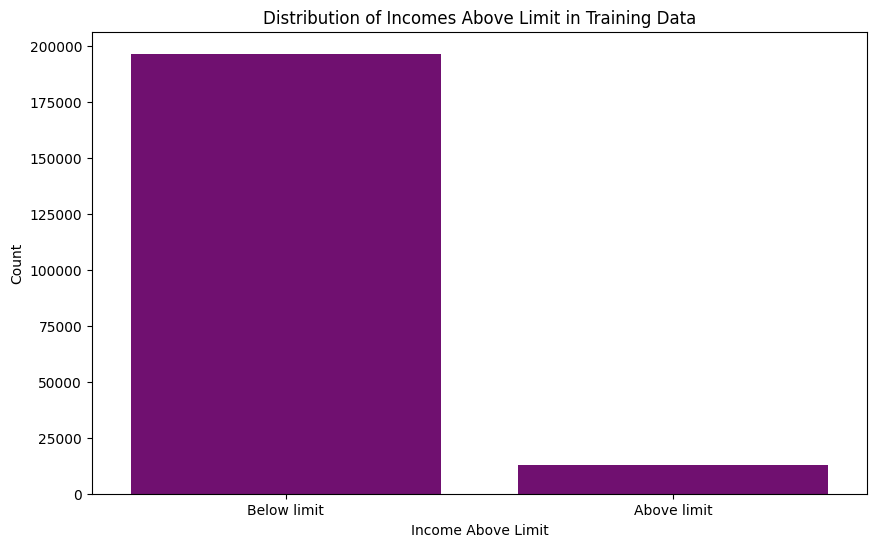

In [18]:
# Visualize distribution of target column 'income_above_limit'

plt.figure(figsize=(10, 6))
sns.countplot(data=training_data, x='income_above_limit', color='purple')
plt.title('Distribution of Incomes Above Limit in Training Data')
plt.xlabel('Income Above Limit')
plt.ylabel('Count')
plt.show()


In [19]:
training_data.dtypes

age                         int64
gender                     object
education                  object
class                      object
marital_status             object
race                       object
is_hispanic                object
employment_commitment      object
employment_stat             int64
wage_per_hour               int64
is_labor_union             object
working_week_per_year       int64
industry_code_main         object
occupation_code_main       object
total_employed              int64
household_stat             object
under_18_family            object
vet_benefit                 int64
tax_status                 object
gains                       int64
losses                      int64
stocks_status               int64
citizenship                object
mig_year                    int64
country_of_birth_own       object
country_of_birth_father    object
country_of_birth_mother    object
income_above_limit         object
dtype: object

In [20]:
# Select numerical columns
numerical_cols = training_data.select_dtypes(include='number').columns
numerical_cols


Index(['age', 'employment_stat', 'wage_per_hour', 'working_week_per_year',
       'total_employed', 'vet_benefit', 'gains', 'losses', 'stocks_status',
       'mig_year'],
      dtype='object')

In [21]:
# Select categorical columns
categorical_cols = training_data.select_dtypes(include='object').columns
categorical_cols

Index(['gender', 'education', 'class', 'marital_status', 'race', 'is_hispanic',
       'employment_commitment', 'is_labor_union', 'industry_code_main',
       'occupation_code_main', 'household_stat', 'under_18_family',
       'tax_status', 'citizenship', 'country_of_birth_own',
       'country_of_birth_father', 'country_of_birth_mother',
       'income_above_limit'],
      dtype='object')

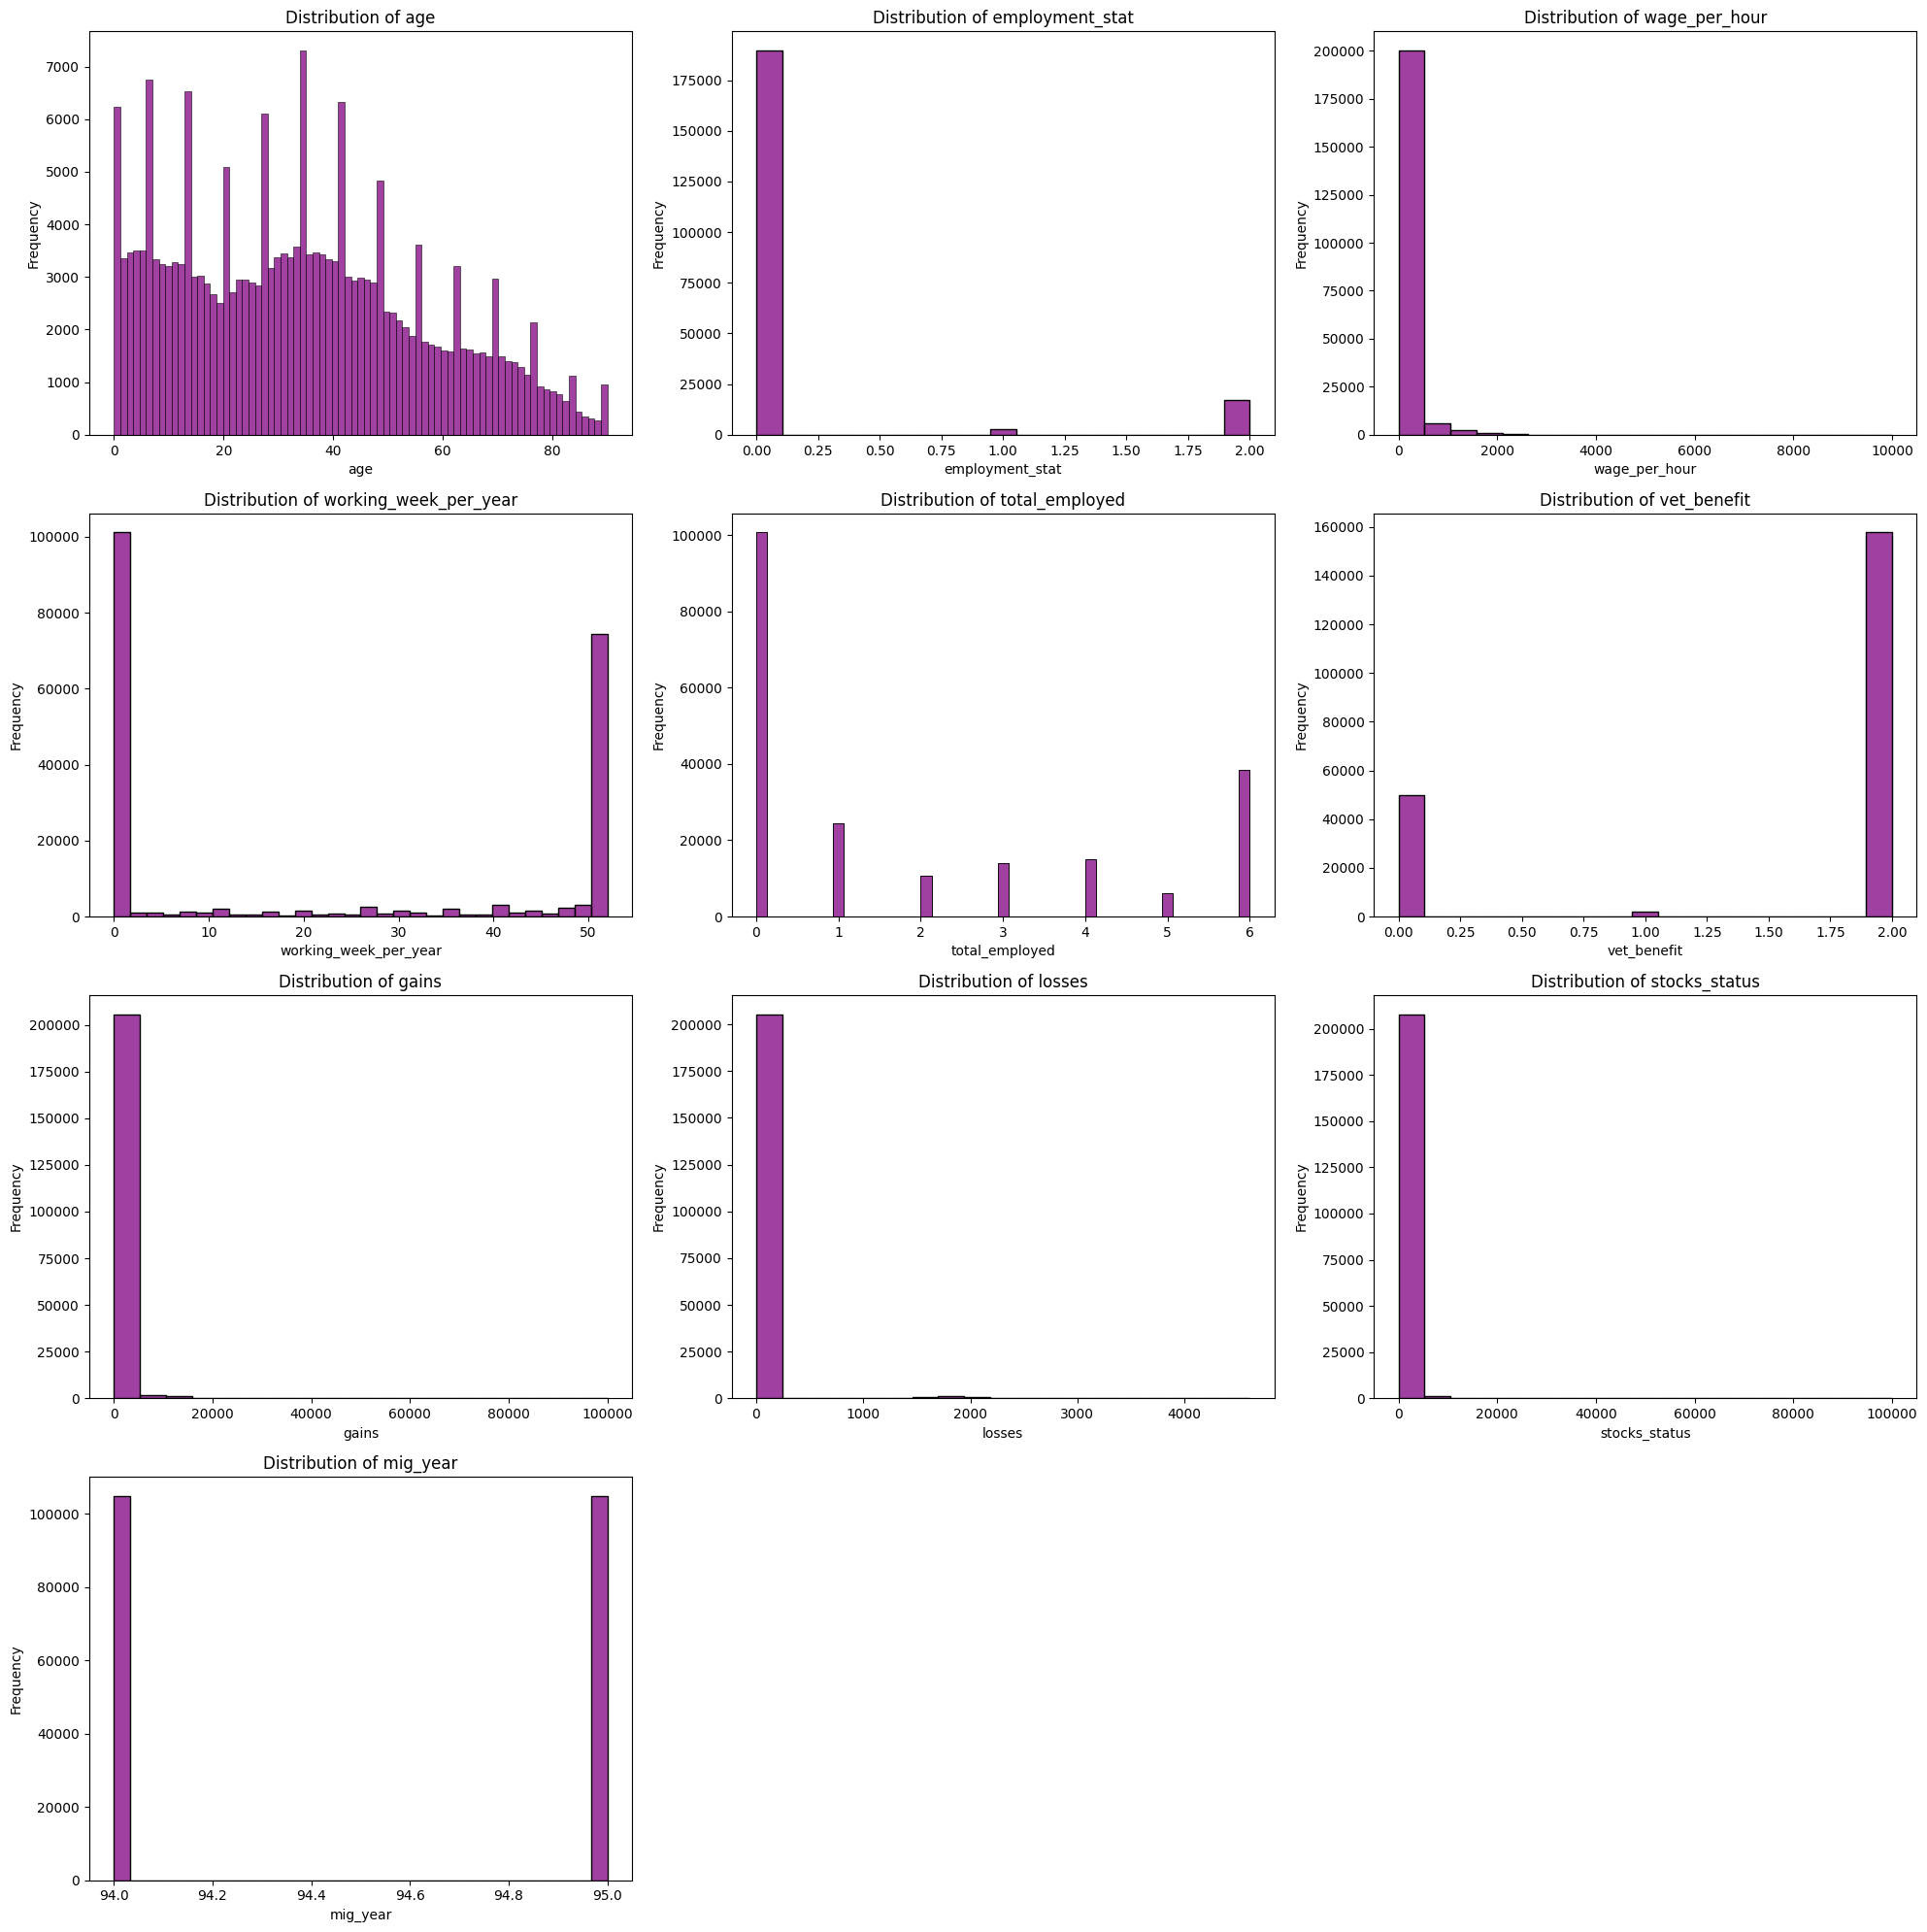

In [22]:
# Visualize the distribution of each column using a histogram
# Create a figure with subplots
plt.figure(figsize=(20, 20))

# Loop through each column and create a histogram
for i, column in enumerate(numerical_cols, start=1):
    plt.subplot(4, 3, i)  # 3 rows, 3 columns, ith subplot
    sns.histplot(data=training_data, x=column, color='purple')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


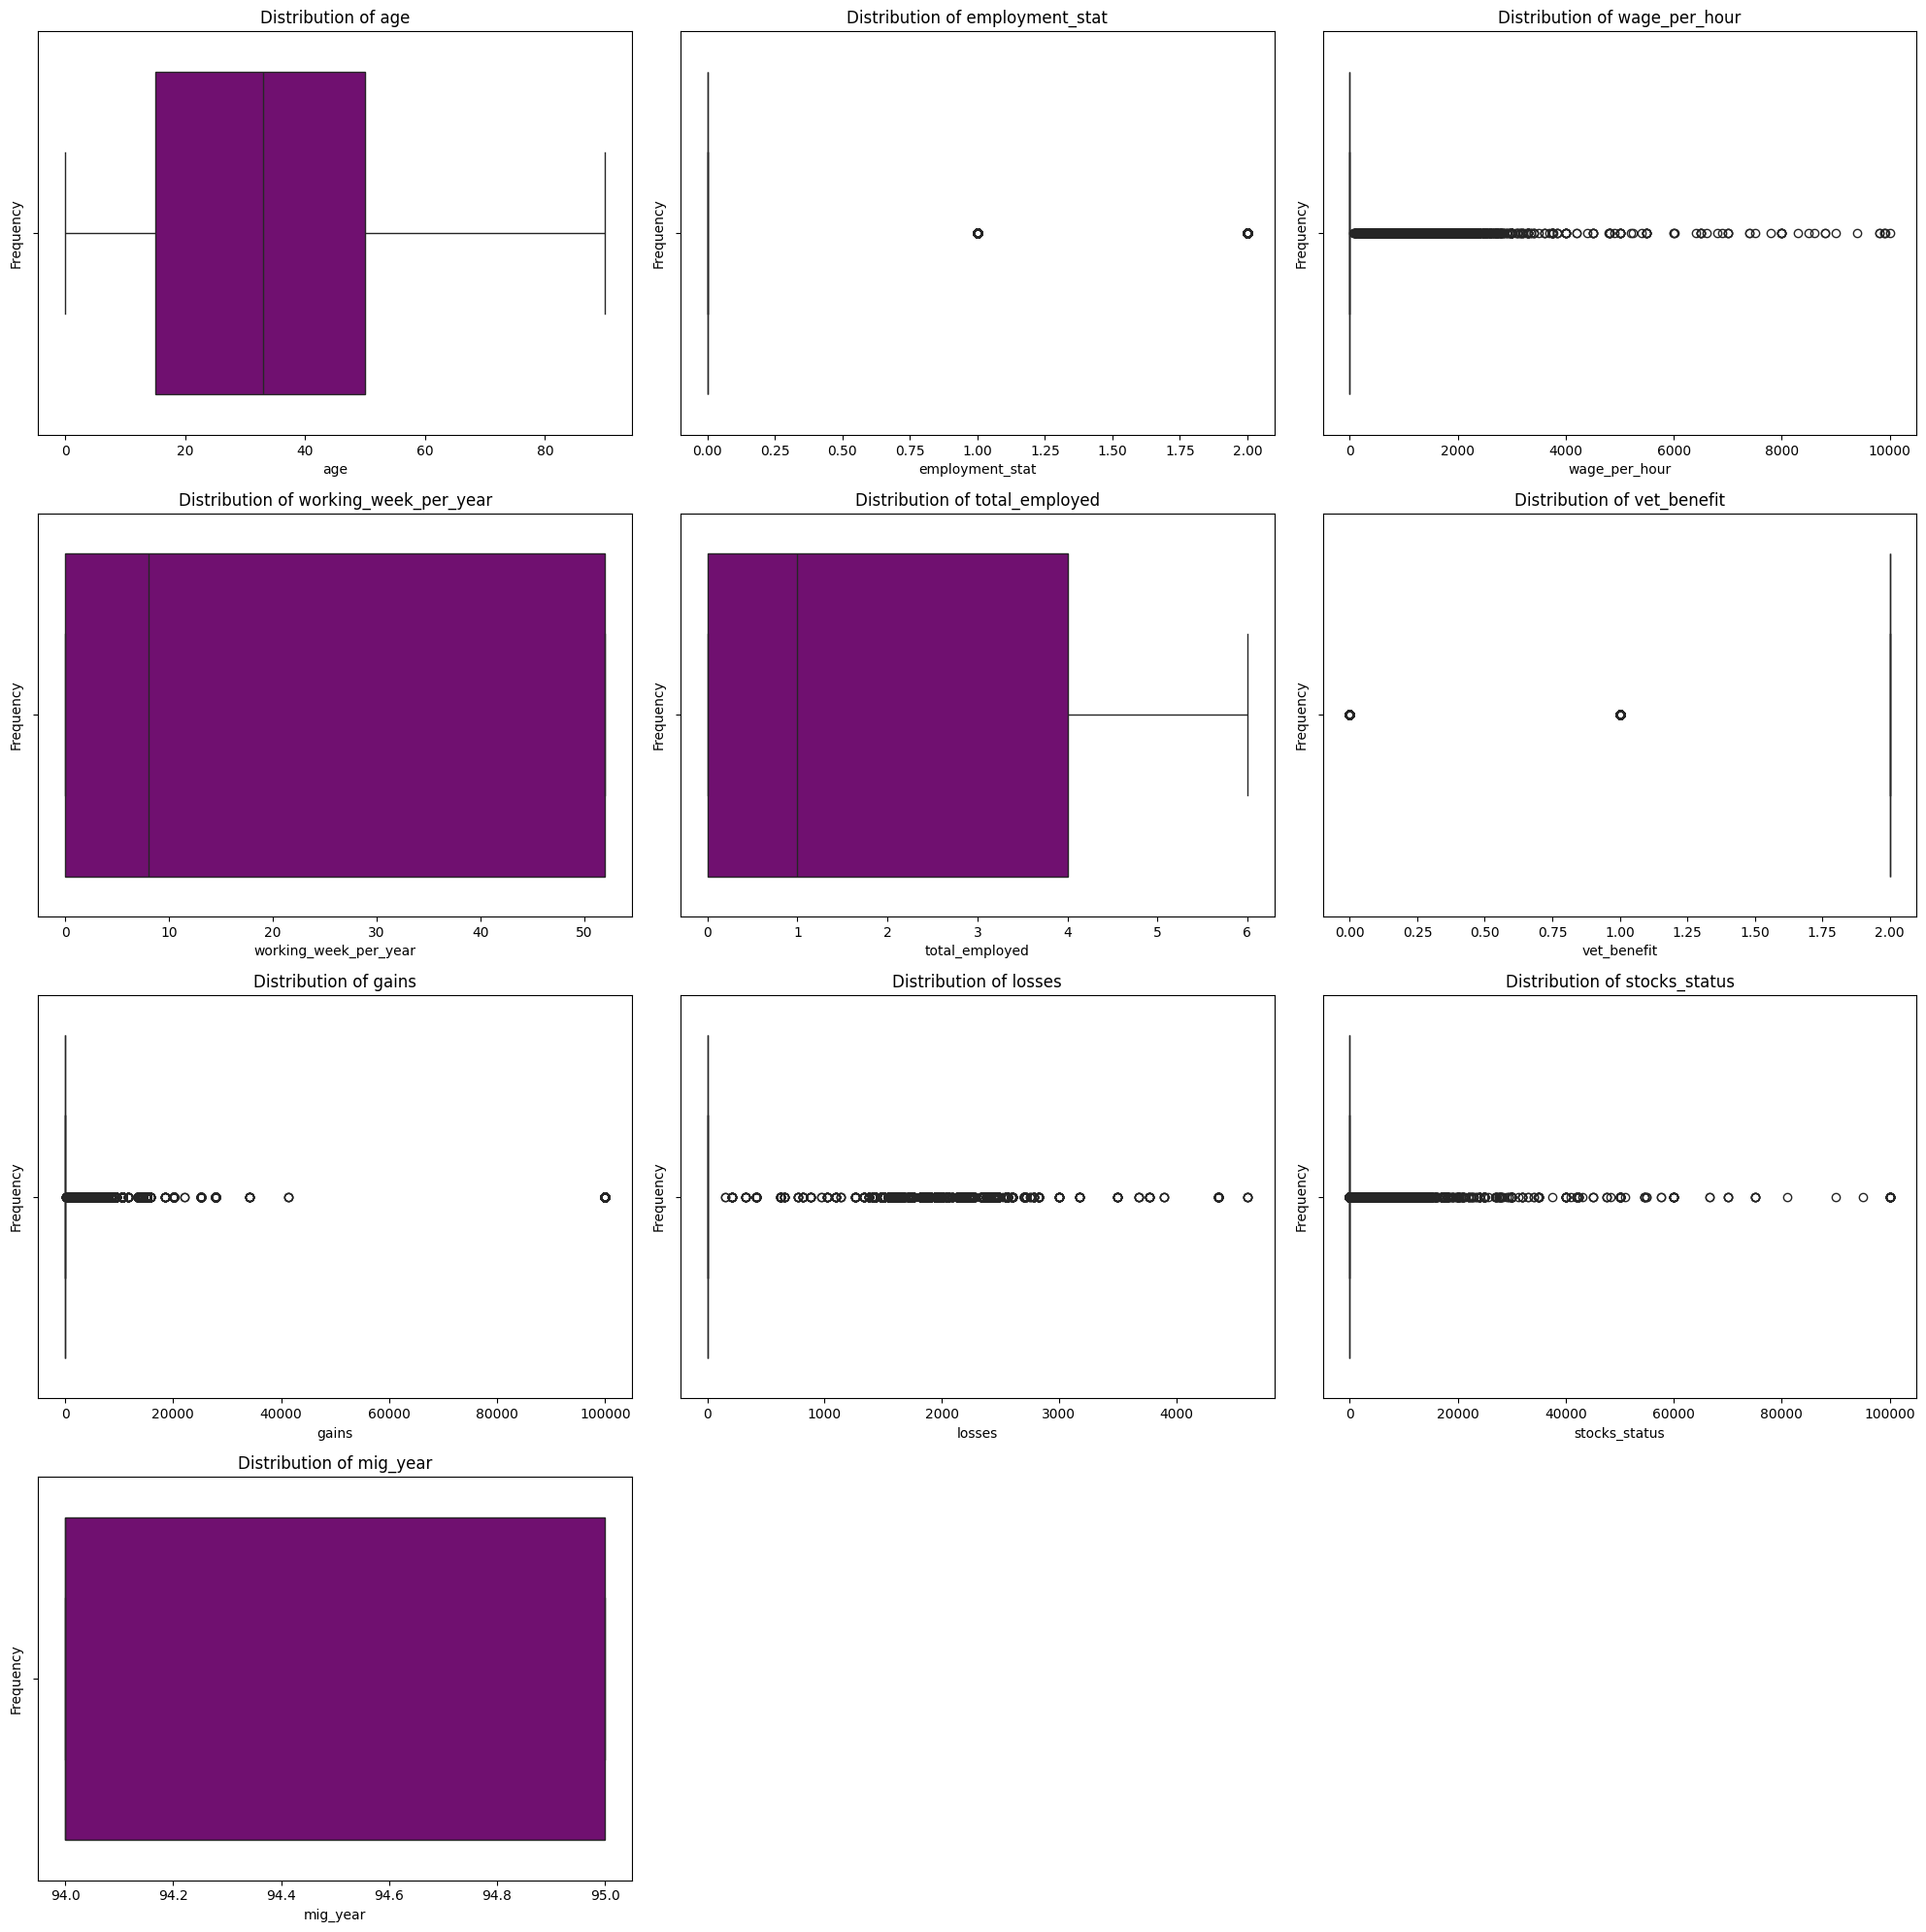

In [23]:
# Visualize the distribution of each column using a histogram
# Create a figure with subplots
plt.figure(figsize=(20, 20))

# Loop through each column and create a histogram
for i, column in enumerate(numerical_cols, start=1):
    plt.subplot(4, 3, i)  # 3 rows, 3 columns, ith subplot
    sns.boxplot(data=training_data, x=column, color='purple')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


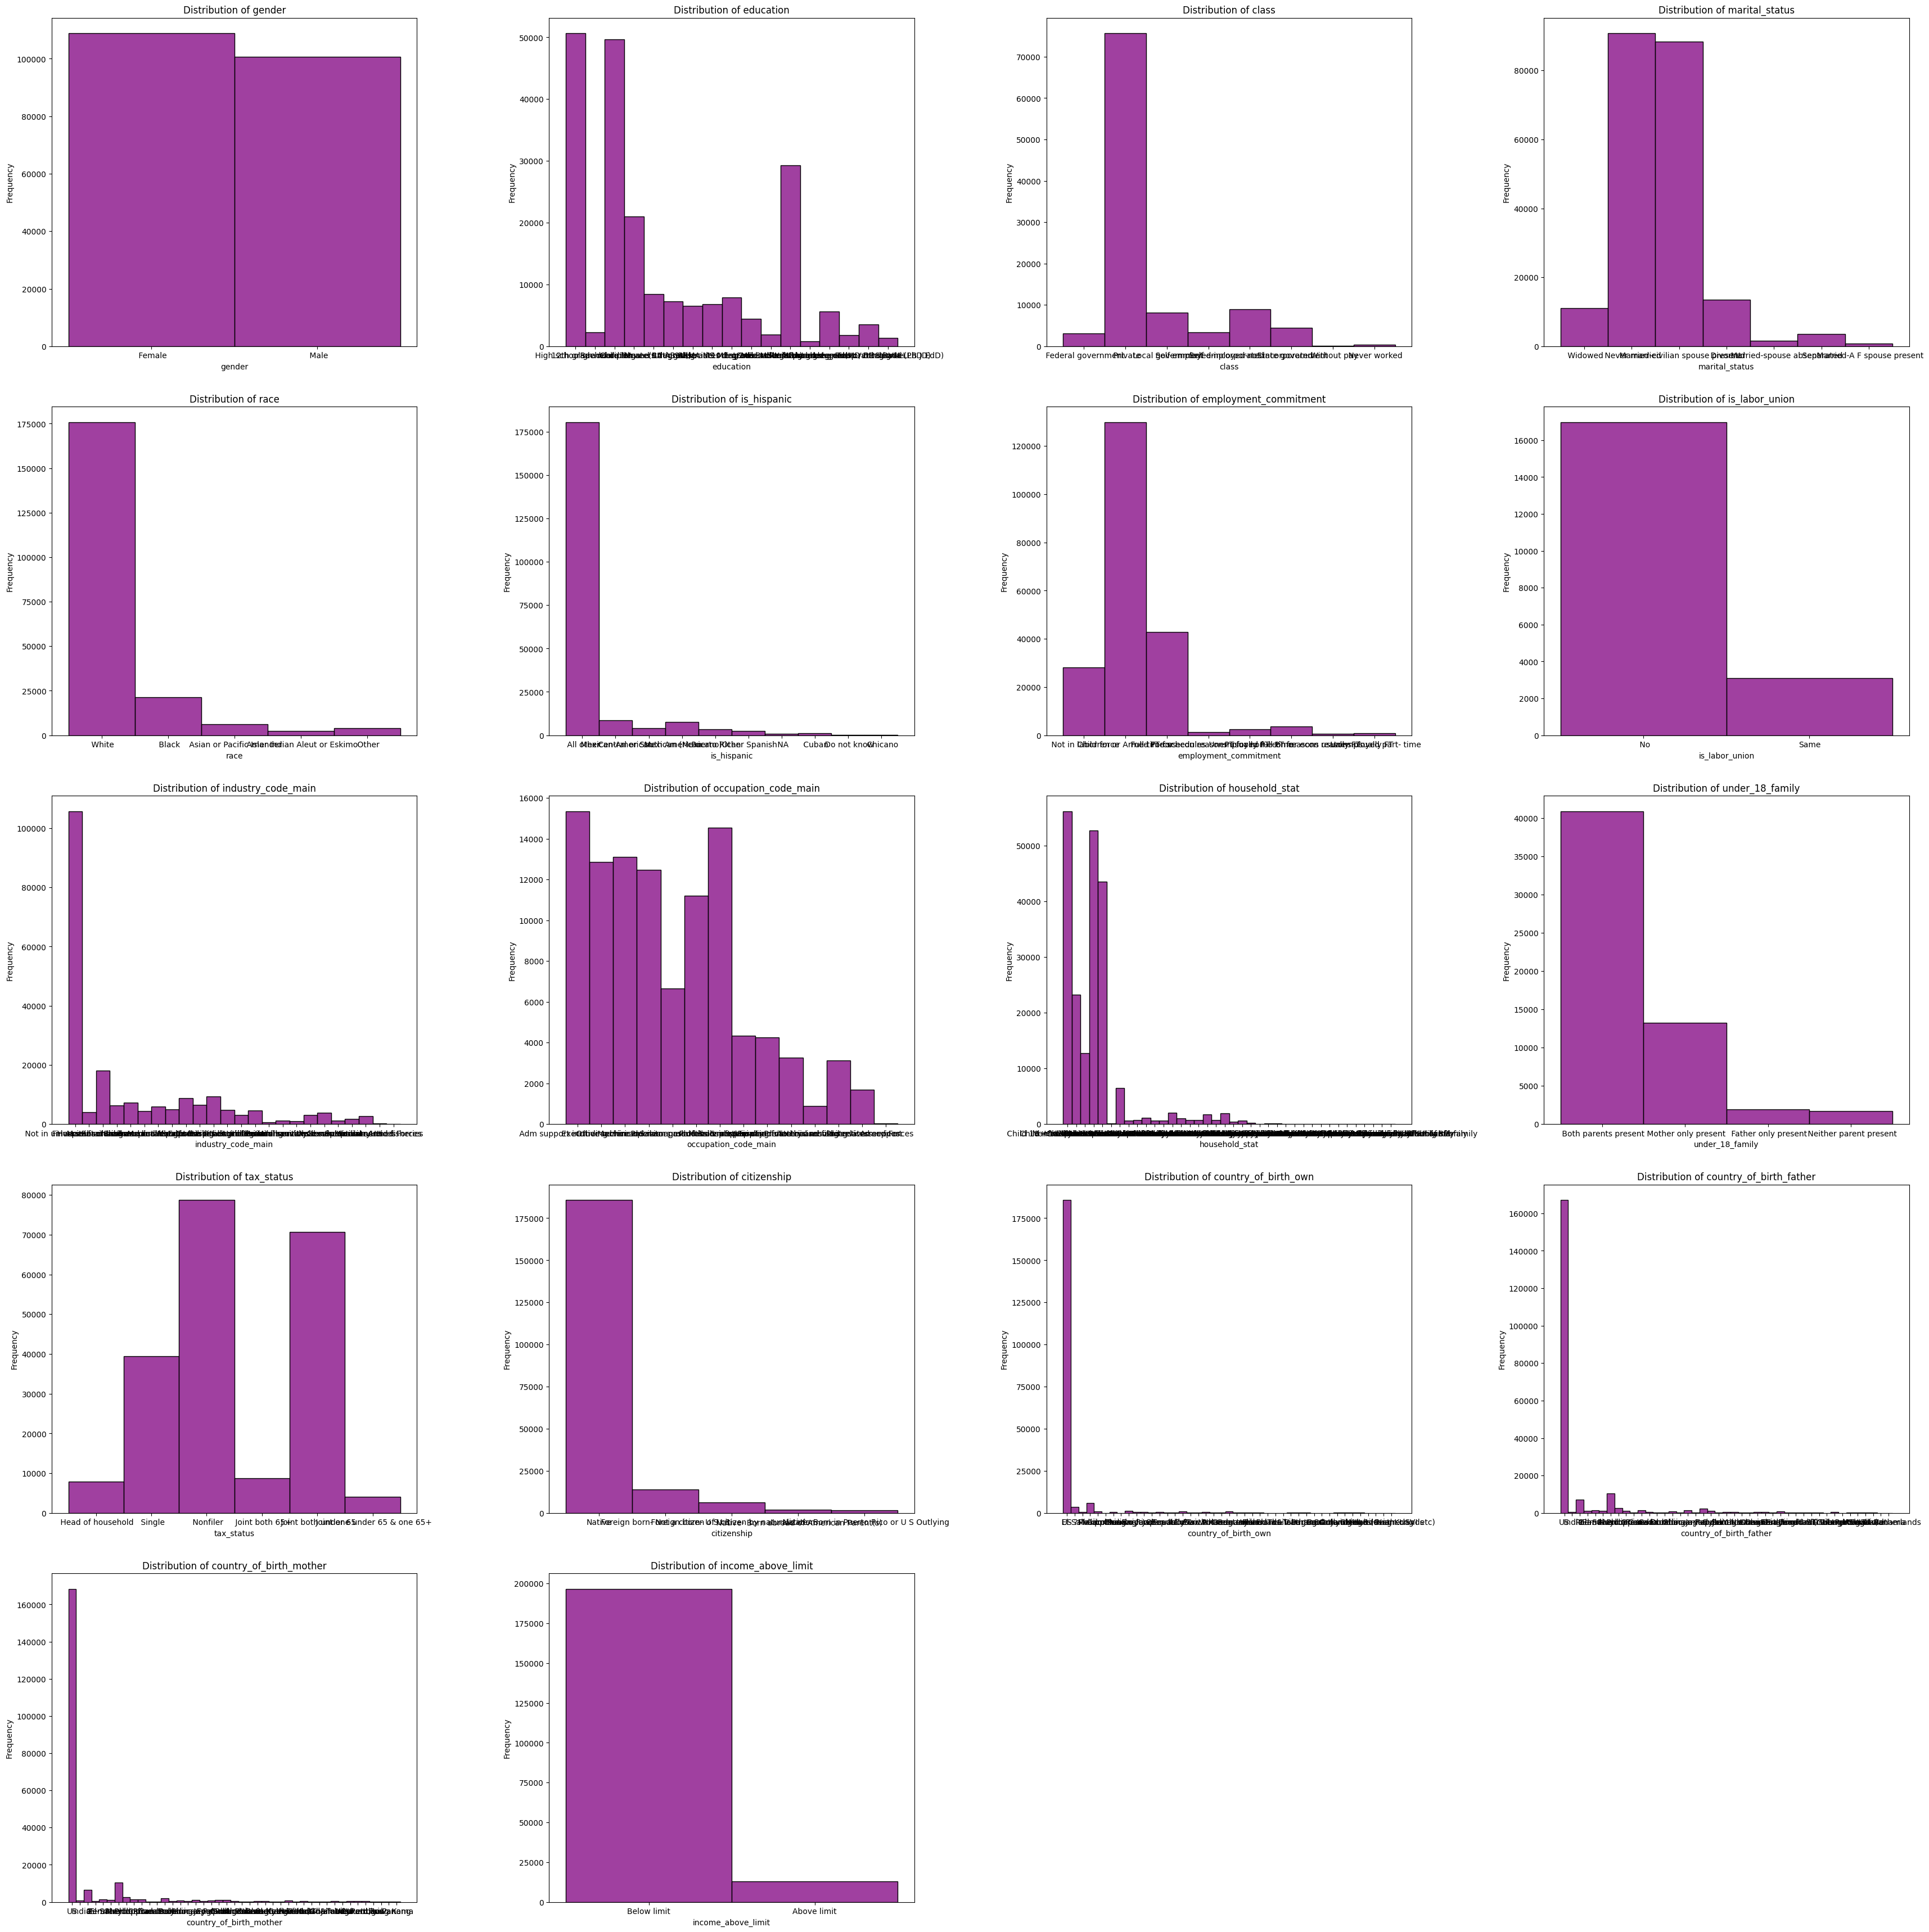

In [24]:
# Visualize the distribution of each categorical column
# Create a figure with subplots
plt.figure(figsize=(35, 35))

# Loop through each column and create a violin plot
for i, column in enumerate(categorical_cols, start=1):
    plt.subplot(5, 4, i)  # 6 rows, 3 columns, ith subplot
    sns.histplot(data=train_data, x=column, color='purple')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout(pad=3.0)
plt.show()


### **Bivariate Analysis**

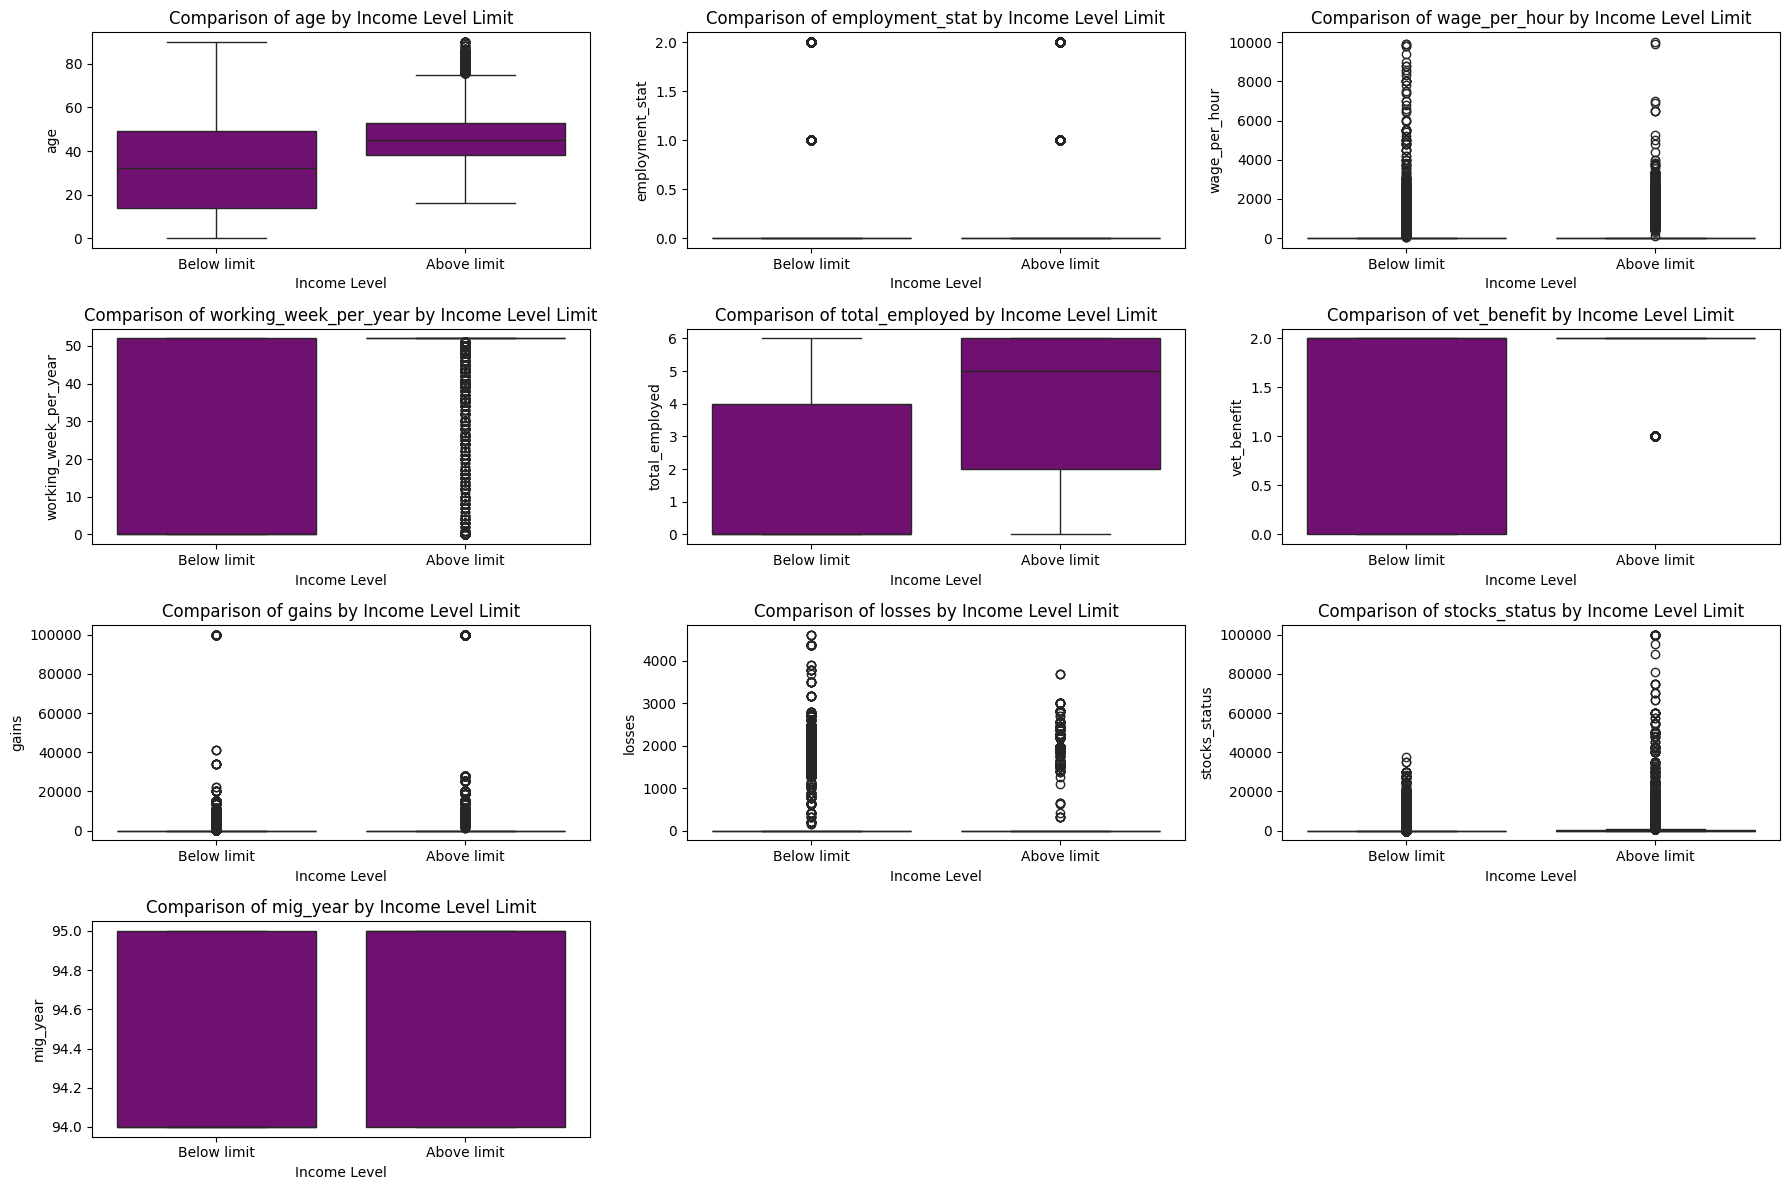

In [25]:
# Compare income distribution with each of the numerical columns
# use boxplot to see outliers

# Create subplots for each numeric column
plt.figure(figsize=(18, 12))

for i, column in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x='income_above_limit', y=column, data=training_data, color='purple')
    plt.title(f'Comparison of {column} by Income Level Limit')
    plt.xlabel('Income Level')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


ValueError: num must be an integer with 1 <= num <= 15, not 16

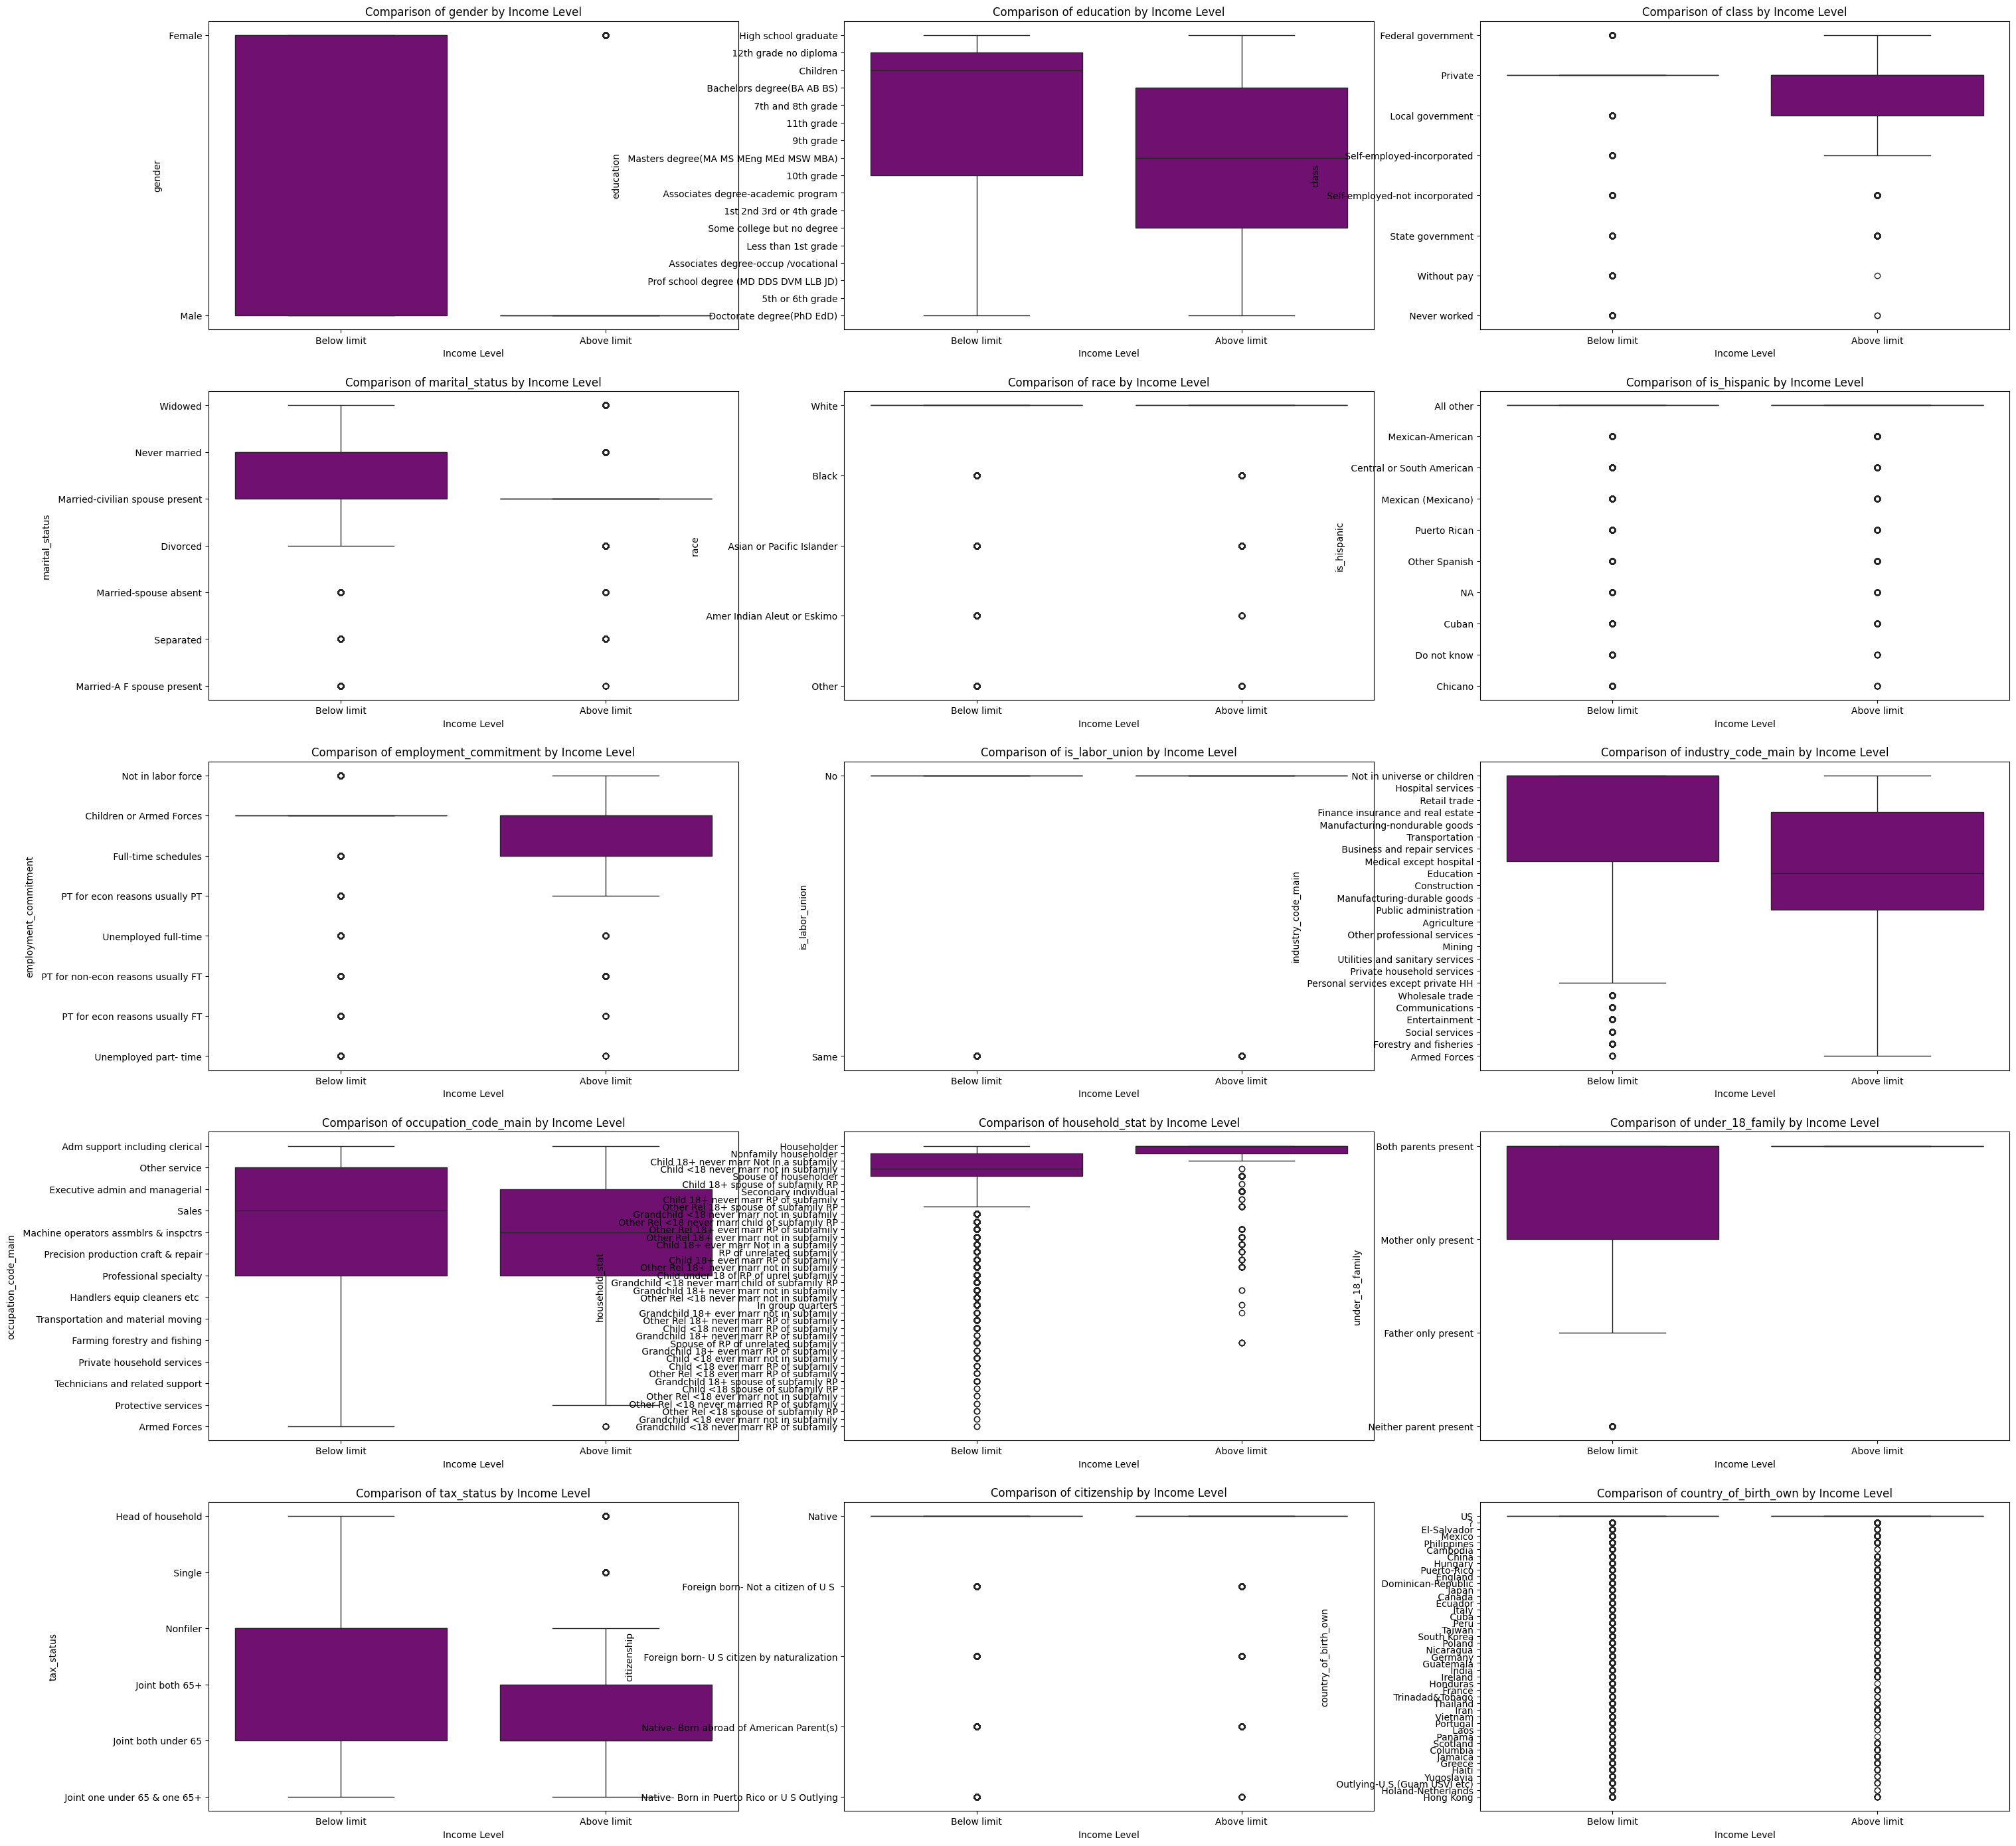

In [26]:
# Compare sepsis distribution with each of the categorical columns
# Use boxplot to see outliers

# Create subplots for each numeric column
plt.figure(figsize=(35, 35))

for i, column in enumerate(categorical_cols, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x='income_above_limit', y=column, data=training_data, color='purple')
    plt.title(f'Comparison of {column} by Income Level')
    plt.xlabel('Income Level')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


#### **Key Insights from Univariate Analysis**
1. There are many outliers in the columns
2. Majority of columns are skewed to the right